<a href="https://colab.research.google.com/github/RacheleRice/h5n1_pandy_probability/blob/main/1_27_25_h5n1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

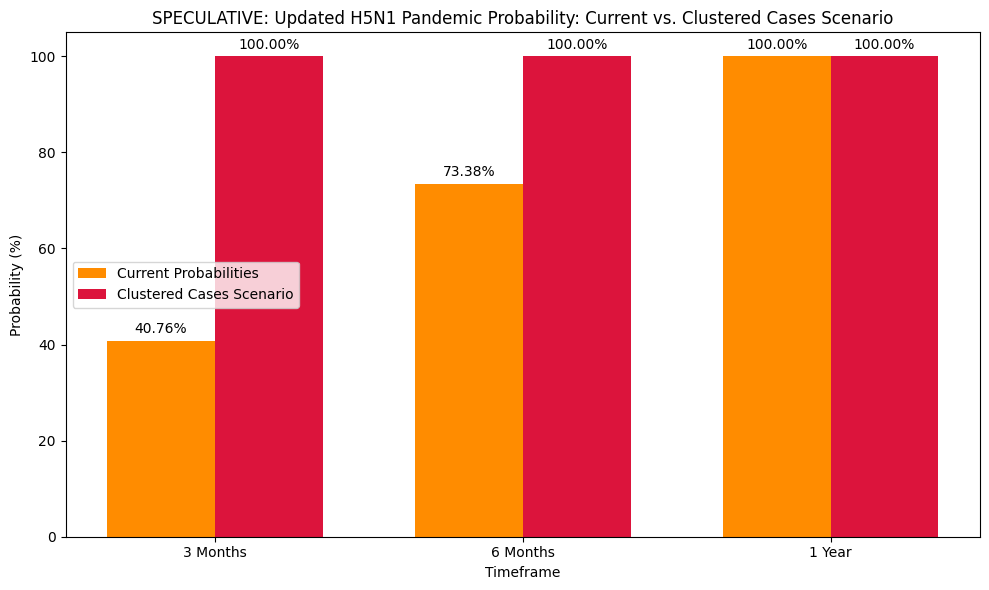

{'Current Probabilities (%)': [40.764, 73.3752, 100.0],
 'Clustered Scenario Probabilities (%)': [100.0, 100.0, 100.0]}

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#                  ***SPECULATIVE: SCROLL DOWN FOR CHART***

# Updated model parameters incorporating recent developments
prior_pandemic = 0.13  # Adjusted for H5N9 presence, and reinfection in cows in ID
likelihood_spread = 0.92  # Higher due to reassortment potential/mammalian adaptation, increased occupational and community exposure risks due to public health comms blackout
new_evidence_factor = 0.90  # Heightened risk from transparency concerns, adjusted downward to account for reduced reliability/incompletely of data due to widespread federal comms blackout and significantly delayed public health updates
global_spread_factor = 0.30  # Impaired surveillance and testing dt disruptions/operational constraints at NIH/CDC/USDA, etc. May hinder genetic sequencing, serological testing, and case tracking.  Could lead to undetected clusters or missed signals of h2h transmission.

# Updated probabilities using Bayesian adjustment
prob_3_months = (prior_pandemic * likelihood_spread * new_evidence_factor) + global_spread_factor
prob_6_months = prob_3_months * 1.8  # Risk compounds over time adjusted downward
prob_1_year = prob_3_months * 2.5  # Risk significantly increases over a year, adjusted downward

# Ensure probabilities do not exceed 100%
prob_3_months = min(prob_3_months, 1.0)
prob_6_months = min(prob_6_months, 1.0)
prob_1_year = min(prob_1_year, 1.0)

# Clustered cases scenario
cluster_multiplier = 2.8  # Increased risk for clustered reassortment events/mammalian adaptation, US withdrawal from WHO, and restrictions on interagency comms + global reassortment risks dt new H5N9 + other bird flu strains infecting new hosts, internationally
prob_3_months_cluster = prob_3_months * cluster_multiplier
prob_6_months_cluster = prob_6_months * cluster_multiplier
prob_1_year_cluster = prob_1_year * cluster_multiplier

# Ensure cluster probabilities do not exceed 100%
prob_3_months_cluster = min(prob_3_months_cluster, 1.0)
prob_6_months_cluster = min(prob_6_months_cluster, 1.0)
prob_1_year_cluster = min(prob_1_year_cluster, 1.0)

# Convert probabilities to percentages
current_probabilities = [prob_3_months * 100, prob_6_months * 100, prob_1_year * 100]
cluster_probabilities = [
    prob_3_months_cluster * 100,
    prob_6_months_cluster * 100,
    prob_1_year_cluster * 100,
]
timeframes = ['3 Months', '6 Months', '1 Year']

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(timeframes))
bar_width = 0.35

# Bar chart for current probabilities
bars1 = plt.bar(index, current_probabilities, bar_width, label='Current Probabilities', color='darkorange')

# Bar chart for clustered scenario
bars2 = plt.bar(index + bar_width, cluster_probabilities, bar_width, label='Clustered Cases Scenario', color='crimson')

# Chart details
plt.title('SPECULATIVE: Updated H5N1 Pandemic Probability: Current vs. Clustered Cases Scenario')
plt.ylabel('Probability (%)')
plt.xlabel('Timeframe')
plt.xticks(index + bar_width / 2, timeframes)
plt.ylim(0, 105)
plt.legend()

# Add value labels
for bars, values in zip([bars1, bars2], [current_probabilities, cluster_probabilities]):
    for bar, value in zip(bars, values):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Output updated probabilities for record
{
    "Current Probabilities (%)": current_probabilities,
    "Clustered Scenario Probabilities (%)": cluster_probabilities
}
